<a href="https://colab.research.google.com/github/NahataiTep/DPDM65/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Data

In [3]:
Data = pd.read_csv('/content/drive/MyDrive/DPDM2022/train.csv')

In [4]:
Data.shape

(2725, 41)

In [5]:
Data.head()

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN


In [6]:
Data.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)           object
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan         object
number_of_va          float64
construct_year        float64
model                 float64
sell_price             object
number_of_unit         object
number_of_story        object
number_of_bedroom      object
number_of_bathroom     object
number_of_parking      object
usable_are

In [7]:
Data.describe()

,Unnamed: 0,land wide(m),zip_code,number_of_rai,number_of_va,construct_year,model
count,2725.000000,315.000000,1.741000e+03,2725.000000,2725.000000,0.0,0.0
mean,1362.000000,55.456159,4.635122e+06,3.561101,44.054606,NaN,NaN
std,786.784066,75.585414,1.355348e+08,15.905963,58.956727,NaN,NaN
min,0.000000,4.000000,4.000000e+04,0.000000,0.000000,NaN,NaN
25%,681.000000,12.000000,4.000000e+04,0.000000,5.000000,NaN,NaN
50%,1362.000000,27.500000,4.000000e+04,0.000000,35.000000,NaN,NaN
75%,2043.000000,65.000000,4.013000e+04,0.000000,66.000000,NaN,NaN
max,2724.000000,420.000000,4.000040e+09,458.000000,1656.000000,NaN,NaN


In [8]:
Data.isnull().any()

Unnamed: 0            False
id                    False
project_name           True
company                True
province               True
district               True
sub_district           True
property_type         False
home improvement       True
renovate               True
public utility         True
land type              True
land wide(m)           True
land long(m)           True
topsoil                True
corner                 True
zip_code               True
zone                   True
alley                  True
street                 True
latitude               True
longitude              True
number_of_rai         False
number_of_ngan        False
number_of_va          False
construct_year         True
model                  True
sell_price             True
number_of_unit         True
number_of_story        True
number_of_bedroom      True
number_of_bathroom     True
number_of_parking      True
usable_area            True
central_cost           True
direction           

# Preparation

##จัดการข้อมูลที่มีปัญหา

In [9]:
Data['sell_price'] = pd.to_numeric(Data['sell_price'],errors='coerce')
Data['number_of_ngan'] = pd.to_numeric(Data['number_of_ngan'],errors='coerce')
Data['number_of_unit'] = pd.to_numeric(Data['number_of_unit'],errors='coerce')
Data['number_of_story'] = pd.to_numeric(Data['number_of_story'],errors='coerce')
Data['number_of_bedroom'] = pd.to_numeric(Data['number_of_bedroom'],errors='coerce')
Data['number_of_bathroom'] = pd.to_numeric(Data['number_of_bathroom'],errors='coerce')
Data['number_of_parking'] = pd.to_numeric(Data['number_of_parking'],errors='coerce')
Data['usable_area'] = pd.to_numeric(Data['usable_area'],errors='coerce')
Data['land long(m)'] = pd.to_numeric(Data['land long(m)'],errors='coerce')

In [10]:
Data.dtypes

Unnamed: 0              int64
id                     object
project_name           object
company                object
province               object
district               object
sub_district           object
property_type          object
home improvement       object
renovate               object
public utility         object
land type              object
land wide(m)          float64
land long(m)          float64
topsoil                object
corner                 object
zip_code              float64
zone                   object
alley                  object
street                 object
latitude               object
longitude              object
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
construct_year        float64
model                 float64
sell_price            float64
number_of_unit        float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
number_of_parking     float64
usable_are

In [11]:
Data.describe()

,Unnamed: 0,land wide(m),land long(m),zip_code,number_of_rai,number_of_ngan,number_of_va,construct_year,model,sell_price,number_of_unit,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
count,2725.000000,315.000000,251.000000,1.741000e+03,2725.000000,2724.000000,2725.000000,0.0,0.0,2.715000e+03,8.00000,1162.000000,1866.000000,1613.000000,1408.000000,1807.000000
mean,1362.000000,55.456159,101.519163,4.635122e+06,3.561101,0.698238,44.054606,NaN,NaN,2.837311e+07,187.00000,1.819277,1.587353,1.463732,1.240057,658.507853
std,786.784066,75.585414,118.978390,1.355348e+08,15.905963,4.361887,58.956727,NaN,NaN,7.713639e+08,140.87786,2.143345,2.253417,1.489652,8.321749,8553.396424
min,0.000000,4.000000,2.000000,4.000000e+04,0.000000,0.000000,0.000000,NaN,NaN,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,681.000000,12.000000,20.000000,4.000000e+04,0.000000,0.000000,5.000000,NaN,NaN,1.450000e+06,64.25000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1362.000000,27.500000,41.000000,4.000000e+04,0.000000,0.000000,35.000000,NaN,NaN,2.590000e+06,170.50000,2.000000,1.000000,1.000000,0.000000,23.000000
75%,2043.000000,65.000000,150.000000,4.013000e+04,0.000000,1.000000,66.000000,NaN,NaN,4.900000e+06,336.50000,2.000000,3.000000,2.000000,2.000000,150.000000
max,2724.000000,420.000000,644.000000,4.000040e+09,458.000000,145.000000,1656.000000,NaN,NaN,4.000000e+10,347.00000,37.000000,40.000000,16.000000,288.000000,232000.000000


## เลือกเฉพาะตัวแปรที่สนใจ

In [12]:
Data0 = Data.dropna(subset=['district'])

In [13]:
Data0

,Unnamed: 0,id,project_name,company,province,district,sub_district,property_type,home improvement,renovate,...,number_of_bathroom,number_of_parking,usable_area,central_cost,direction,furniture,building_number,number_of_building,floor_number,parking_percentage
0,0,676.0,กันยารัตน์ ฟลอร่า วิลล์,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,NaN,0.0,0.0,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
1,1,19711.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ศิลา,ที่ดิน,NaN,NaN,...,NaN,NaN,NaN,NaN,ไม่ระบุ,ไม่ระบุ,NaN,NaN,NaN,NaN
2,2,30146P,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,NaN,NaN,...,2.0,1.0,208.0,NaN,NaN,"ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...",NaN,NaN,NaN,NaN
3,3,1899.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,แดงใหญ่,บ้านเดี่ยว,no,no,...,3.0,3.0,145.0,0.0,ไม่ระบุ,ไม่มี,NaN,NaN,NaN,NaN
4,4,23503.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านค้อ,บ้านเดี่ยว,no,no,...,2.0,3.0,114.0,0.0,ตะวันออกเฉียงใต้,ไม่ระบุ,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,2720,5130.0,เดอะ มอร์ ศรีจันทร์ ขอนแก่น,บริษัท วี ไอ พี แกรนด์ จำกัด,ขอนแก่น,เมืองขอนแก่น,พระลับ,บ้านเดี่ยว,no,no,...,6.0,5.0,0.0,1350.0,เหนือ,ตกแต่งครบ,NaN,NaN,NaN,NaN
2721,2721,30284P,NaN,NaN,ขอนแก่น,บ้านแฮด,บ้านแฮด,ที่ดิน,NaN,NaN,...,NaN,NaN,4625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2722,2722,6326.0,NaN,NaN,ขอนแก่น,เมืองขอนแก่น,บ้านทุ่ม,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN
2723,2723,6045.0,กันยารัตน์ การ์เด้นวิว รีสอร์ท,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,ขอนแก่น,เมืองขอนแก่น,ในเมือง,บ้านเดี่ยว,no,no,...,0.0,0.0,0.0,0.0,ไม่ระบุ,ไม่ระบุ,NaN,NaN,0.0,NaN


### ตัวแปรเชิงปริมาณ

In [14]:
Data1 = Data0.iloc[:,[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False]]

In [15]:
Data1   #ตัวแปรเชิงปริมาณ

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
0,0.0,0.0,98.4,NaN,0.0,NaN,0.0,0.0
1,3.0,0.0,72.0,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,52.0,1.0,3.0,2.0,1.0,208.0
3,0.0,0.0,40.0,2.0,3.0,3.0,3.0,145.0
4,0.0,0.0,50.0,1.0,2.0,2.0,3.0,114.0
...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,2.0,5.0,6.0,5.0,0.0
2721,11.0,2.0,25.0,NaN,NaN,NaN,NaN,4625.0
2722,0.0,0.0,58.0,NaN,0.0,0.0,0.0,0.0
2723,0.0,0.0,78.0,NaN,0.0,0.0,0.0,0.0


In [16]:
Data1.describe()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
count,2721.000000,2720.000000,2721.000000,1162.000000,1866.000000,1613.000000,1408.000000,1806.000000
mean,3.549063,0.697794,44.082617,1.819277,1.587353,1.463732,1.240057,656.369707
std,15.897485,4.364910,58.973378,2.143345,2.253417,1.489652,8.321749,8555.282402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,35.000000,2.000000,1.000000,1.000000,0.000000,23.000000
75%,0.000000,1.000000,66.000000,2.000000,3.000000,2.000000,2.000000,150.000000
max,458.000000,145.000000,1656.000000,37.000000,40.000000,16.000000,288.000000,232000.000000


In [17]:
Data1.dtypes

number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
number_of_parking     float64
usable_area           float64
dtype: object

###ตัวแปรเชิงคุณภาพ

In [18]:
set(Data0['district'])

{'กระนวน',
 'ชนบท',
 'ชุมแพ',
 'ชุุมแพ',
 'ซำสูง',
 'ท่าพระ',
 'น้ำพอง',
 'บ้านทุ่ม',
 'บ้านฝาง',
 'บ้านแฮด',
 'บ้านไผ่',
 'พระยืน',
 'พล',
 'ภูผาม่าน',
 'ภูเวียง',
 'มัญจาคีรี',
 'สีชมพู',
 'หนองนาคำ',
 'หนองสองห้อง',
 'หนองเรือ',
 'หนอนนาคำ',
 'อุบลรัตน์',
 'เขาสวนกวาง',
 'เปือยน้อย',
 'เมืองขอนแก่น',
 'เมืองพล',
 'เวียงเก่า',
 'แวงน้อย',
 'แวงใหญ่',
 'โคกโพธิ์ไชย',
 'โนนศิลา',
 'ในเมือง'}

In [19]:
set(Data0['property_type'])

{'คอนโด',
 'ทาวน์โฮม',
 'ที่ดิน',
 'บ้านเดี่ยว',
 'บ้านแฝด',
 'อาคารพาณิชย์/สำนักงาน'}

In [20]:
set(Data0['furniture'])

{'- เครื่องทำน้ำอุ่น 2ตัว\n- มุ้งลวด ทั้งหลัง\n- เหล็กดัด ทั้งหลัง\n- ม่าน มู่ลี่ทั้งหลัง\n- กล้องวงจรปิด 8 ช่อง\n- แอร์ 2ตัว\n- ปั๊มน้ำ 1ตัว',
 nan,
 'tv\nrefrigerator\n3.5 feet bed\n3.5 feet mattress and blanket\nAir conditioner\nmicrowave\nPigtail mattress',
 'yes',
 'ครบครัน',
 'ครบชุด',
 'ครื่องปรับอากาศ 2 เครื่องในห้องนอน\nถังเก็บน้ำและปั๊มน้ำ',
 'ตกแต่งครบ',
 'ตู้เย็น เครื่องดูดควัน เตาไฟฟ้า แทงค์และปั้มน้ำ เครื่องทำน้ำอุ่น กล้องวงจรปิด\nจานดาวเทียม',
 'ตู้เย็นใหม่ ชุดโต๊ะทานข้าวกระจกขนาดหกที่นั่ง และ เก้าอี้หกชุด แอร์ และ ปั๊มน้ำ',
 'ทีวี,โซฟา,เตียงพร้อมที่นอน ,ตู้เสื้อผ้า ,โต๊ะ,เคาน์เตอร์ครัว,โต๊ะอาหาร,เครื่องปรับอากาศ 2 เครื่อง\nเครื่องทำน้ำอุ่น 1 เครื่อง เครื่องซักผ้า 1 เครื่อง',
 'บางส่วน',
 'บางส่วน ตู้เย็น เครื่องซักผ้า และแอร์ 3 ตัว',
 'บาวส่วน',
 'พร้อมเฟอร์นิเจอร์ เตียง+ที่นอน ตู้ พัดลม เครื่องปรับอากาศ 2 เครื่อง\nเครื่องทำน้ำอุ่น 2 ชุด กล้องวงจรปิด 4 ตัว\n',
 'พร้อมเฟอร์นิเจอร์ โซฟา โต๊ะ เก้าอี้ เตียง ที่นอน ตู้ ผ้าม่าน แอร์ เครื่องทำน้ำอุ่น',
 'พร้อมเฟอร์นิเจอร์โต๊ะ 

- แบ่งประเภท district เป็น 2 ประเภท คือ 'เมืองขอนแก่น' และ 'ต่างอำเภอ'

- แบ่งประเภท preperty-type เป็น 6 ประเภท คือ 'คอนโด', 'ทาวน์โฮม', 'ที่ดิน', 'บ้านเดี่ยว', 'บ้านแฝด', 'อาคารพาณิชย์/สำนักงาน'

- แบ่งประเภท furniture เป็น 3 ประเภท คือ 'มี', 'ไม่มี', 'ไม่ระบุ'

In [21]:
Data_d = Data0['district']

In [22]:
Data_d[Data_d!='เมืองขอนแก่น'] = 'ต่างอำเภอ'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
set(Data_d)

{'ต่างอำเภอ', 'เมืองขอนแก่น'}

In [24]:
Data_f = Data0['furniture']

In [25]:
Data_f.fillna('ไม่ระบุ')

0                                                 ไม่ระบุ
1                                                 ไม่ระบุ
2       ฟรี! แอร์ 2 เครื่อง, เครื่องทำน้ำอุ่น 2 เครื่อ...
3                                                   ไม่มี
4                                                 ไม่ระบุ
                              ...                        
2720                                            ตกแต่งครบ
2721                                              ไม่ระบุ
2722                                              ไม่ระบุ
2723                                              ไม่ระบุ
2724                                              ไม่ระบุ
Name: furniture, Length: 2721, dtype: object

In [26]:
Data_f[(Data_f=='ไม่มีเฟอร์นิเจอร์') | (Data_f=='ไม่มีเฟอร์นิเจอร์. เฟอร์นิเจอร์นำเข้าสามารถเจรจาแยกกันโดยผู้ซื้อ') | (Data_f=='ไม่รวมตู้เย็น,ทีวี,เครื่องซักผ้า') | (Data_f=='ไม่รวมเฟอร์นิเจอร์')] = 'ไม่มี'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
Data_f[(Data_f!='ไม่ระบุ') & (Data_f!='ไม่มี')] = 'มี'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
set(Data_f)

{'มี', 'ไม่มี', 'ไม่ระบุ'}

In [29]:
Data_d.shape

(2721,)

In [30]:
Data_f.shape

(2721,)

In [31]:
Data2 = pd.concat([Data_d,Data_f,Data0['property_type']], axis=1)   #ตัวแปรเชิงคุณภาพทั้งหมด 3 ตัว

## Data ที่นำไปใช้งาน (รวมปริมาณ-คุณภาพ-sell_price)

In [32]:
Data1.shape

(2721, 8)

In [33]:
Data2.shape

(2721, 3)

In [34]:
DATA1 = pd.concat([Data1,Data2,Data0['sell_price']], axis=1)
DATA1

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,district,furniture,property_type,sell_price
0,0.0,0.0,98.4,NaN,0.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,2860000.0
1,3.0,0.0,72.0,NaN,NaN,NaN,NaN,NaN,เมืองขอนแก่น,ไม่ระบุ,ที่ดิน,17490000.0
2,0.0,0.0,52.0,1.0,3.0,2.0,1.0,208.0,เมืองขอนแก่น,มี,บ้านเดี่ยว,2800000.0
3,0.0,0.0,40.0,2.0,3.0,3.0,3.0,145.0,เมืองขอนแก่น,ไม่มี,บ้านเดี่ยว,2600000.0
4,0.0,0.0,50.0,1.0,2.0,2.0,3.0,114.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,1490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,2.0,5.0,6.0,5.0,0.0,เมืองขอนแก่น,มี,บ้านเดี่ยว,12500000.0
2721,11.0,2.0,25.0,NaN,NaN,NaN,NaN,4625.0,ต่างอำเภอ,มี,ที่ดิน,8671875.0
2722,0.0,0.0,58.0,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,1400000.0
2723,0.0,0.0,78.0,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,2915000.0


In [35]:
DATA1.describe()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,sell_price
count,2721.000000,2720.000000,2721.000000,1162.000000,1866.000000,1613.000000,1408.000000,1806.000000,2.713000e+03
mean,3.549063,0.697794,44.082617,1.819277,1.587353,1.463732,1.240057,656.369707,2.826654e+07
std,15.897485,4.364910,58.973378,2.143345,2.253417,1.489652,8.321749,8555.282402,7.716245e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.450000e+06
50%,0.000000,0.000000,35.000000,2.000000,1.000000,1.000000,0.000000,23.000000,2.590000e+06
75%,0.000000,1.000000,66.000000,2.000000,3.000000,2.000000,2.000000,150.000000,4.900000e+06
max,458.000000,145.000000,1656.000000,37.000000,40.000000,16.000000,288.000000,232000.000000,4.000000e+10


***

##ตัวแปรที่มี
- DATA1: ข้อมูลทั้งหมด ทั้งเชิงปริมาณ (8ตัว) คุณภาพ (3ตัว) และ sell_price
- Data1: ข้อมูลเชิงปริมาณ 8 ตัว
- Data2: ข้อมูลเชิงคุณภาพ 3 ตัว

***

## เช็คความสัมพันธ์ระหว่างตัวแปรเชิงปริมาณแต่ละตัว

In [36]:
Data1.corr(method ='pearson')

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area
number_of_rai,1.000000,0.280728,-0.020567,-0.026279,0.031943,0.033501,0.009666,0.883580
number_of_ngan,0.280728,1.000000,0.044561,-0.042835,-0.039640,0.009264,-0.014232,0.978778
number_of_va,-0.020567,0.044561,1.000000,-0.030907,0.055254,-0.024353,-0.017408,0.043833
number_of_story,-0.026279,-0.042835,-0.030907,1.000000,0.040998,0.091760,0.060434,0.027716
number_of_bedroom,0.031943,-0.039640,0.055254,0.040998,1.000000,0.903177,0.144806,0.232319
number_of_bathroom,0.033501,0.009264,-0.024353,0.091760,0.903177,1.000000,0.126730,0.220844
number_of_parking,0.009666,-0.014232,-0.017408,0.060434,0.144806,0.126730,1.000000,0.050179
usable_area,0.883580,0.978778,0.043833,0.027716,0.232319,0.220844,0.050179,1.000000


จะเห็นว่า
- cor(usable_area, number_of_rai) = 0.883580
- cor(usable_area, number_of_ngan) = 0.978778
- cor(number_of_bedroom, number_of_bathroom) = 0.903177

ซึ่งมีค่าความสัมพันธ์สูงมาก จึงจะตัดค่า usable_area และ number_of_bedroom ออก

In [37]:
Data11 = Data1.drop(columns=['usable_area', 'number_of_bedroom'])
Data11

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bathroom,number_of_parking
0,0.0,0.0,98.4,NaN,NaN,0.0
1,3.0,0.0,72.0,NaN,NaN,NaN
2,0.0,0.0,52.0,1.0,2.0,1.0
3,0.0,0.0,40.0,2.0,3.0,3.0
4,0.0,0.0,50.0,1.0,2.0,3.0
...,...,...,...,...,...,...
2720,0.0,0.0,135.0,2.0,6.0,5.0
2721,11.0,2.0,25.0,NaN,NaN,NaN
2722,0.0,0.0,58.0,NaN,0.0,0.0
2723,0.0,0.0,78.0,NaN,0.0,0.0


In [38]:
Data11.corr(method ='pearson')

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bathroom,number_of_parking
number_of_rai,1.000000,0.280728,-0.020567,-0.026279,0.033501,0.009666
number_of_ngan,0.280728,1.000000,0.044561,-0.042835,0.009264,-0.014232
number_of_va,-0.020567,0.044561,1.000000,-0.030907,-0.024353,-0.017408
number_of_story,-0.026279,-0.042835,-0.030907,1.000000,0.091760,0.060434
number_of_bathroom,0.033501,0.009264,-0.024353,0.091760,1.000000,0.126730
number_of_parking,0.009666,-0.014232,-0.017408,0.060434,0.126730,1.000000


## รวมตัวแปร


In [39]:
Area = Data11['number_of_rai']*400+Data11['number_of_ngan']*100+Data11['number_of_va']  #แปลงข้อมูล
Data12 = Data11.drop(columns=['number_of_rai', 'number_of_ngan', 'number_of_va'])
Data12 = pd.concat([Area, Data12], axis=1)
Data12

,0,number_of_story,number_of_bathroom,number_of_parking
0,98.4,NaN,NaN,0.0
1,1272.0,NaN,NaN,NaN
2,52.0,1.0,2.0,1.0
3,40.0,2.0,3.0,3.0
4,50.0,1.0,2.0,3.0
...,...,...,...,...
2720,135.0,2.0,6.0,5.0
2721,4625.0,NaN,NaN,NaN
2722,58.0,NaN,0.0,0.0
2723,78.0,NaN,0.0,0.0


In [40]:
Data12.corr(method ='pearson')

,0,number_of_story,number_of_bathroom,number_of_parking
0,1.000000,-0.030524,0.029393,0.007461
number_of_story,-0.030524,1.000000,0.091760,0.060434
number_of_bathroom,0.029393,0.091760,1.000000,0.126730
number_of_parking,0.007461,0.060434,0.126730,1.000000


## Check outlier (boxplot)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a6510ca90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a65116550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a6510c490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a65120050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a65120590>],
 'means': []}

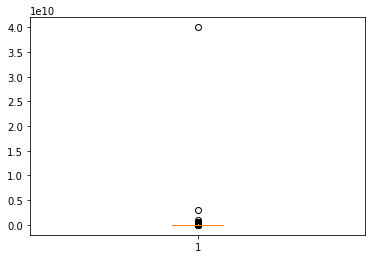

In [41]:
plt.boxplot(DATA1['sell_price'].dropna())

จากรูป จะเห็นว่ามี outlier (ที่เห็นได้ชัด) 2 ตัว

In [42]:
DATA2 = DATA1.loc[DATA1['sell_price'] != max(DATA1['sell_price'])]
DATA2 = DATA2.loc[DATA2['sell_price'] != max(DATA2['sell_price'])]
DATA2

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,number_of_parking,usable_area,district,furniture,property_type,sell_price
0,0.0,0.0,98.4,NaN,0.0,NaN,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,2860000.0
1,3.0,0.0,72.0,NaN,NaN,NaN,NaN,NaN,เมืองขอนแก่น,ไม่ระบุ,ที่ดิน,17490000.0
2,0.0,0.0,52.0,1.0,3.0,2.0,1.0,208.0,เมืองขอนแก่น,มี,บ้านเดี่ยว,2800000.0
3,0.0,0.0,40.0,2.0,3.0,3.0,3.0,145.0,เมืองขอนแก่น,ไม่มี,บ้านเดี่ยว,2600000.0
4,0.0,0.0,50.0,1.0,2.0,2.0,3.0,114.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,1490000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2720,0.0,0.0,135.0,2.0,5.0,6.0,5.0,0.0,เมืองขอนแก่น,มี,บ้านเดี่ยว,12500000.0
2721,11.0,2.0,25.0,NaN,NaN,NaN,NaN,4625.0,ต่างอำเภอ,มี,ที่ดิน,8671875.0
2722,0.0,0.0,58.0,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,1400000.0
2723,0.0,0.0,78.0,NaN,0.0,0.0,0.0,0.0,เมืองขอนแก่น,ไม่ระบุ,บ้านเดี่ยว,2915000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1a64bf7f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1a64bfca50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1a651209d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1a64c02550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1a64c02a90>],
 'means': []}

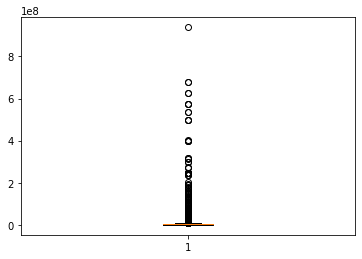

In [43]:
plt.boxplot(DATA2['sell_price'].dropna())

#Regression
- ตัวแปรเชิงคุณภาพ : 3 ตัว
- ตัวแปรเชิงปริมาณ : 11 ตัว
- ทำนาย : sell_price

## แปลง dummy

In [45]:
Data21 = pd.get_dummies(Data2)
Data21

,district_ต่างอำเภอ,district_เมืองขอนแก่น,furniture_มี,furniture_ไม่มี,furniture_ไม่ระบุ,property_type_คอนโด,property_type_ทาวน์โฮม,property_type_ที่ดิน,property_type_บ้านเดี่ยว,property_type_บ้านแฝด,property_type_อาคารพาณิชย์/สำนักงาน
0,0,1,0,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2720,0,1,1,0,0,0,0,0,1,0,0
2721,1,0,1,0,0,0,0,1,0,0,0
2722,0,1,0,0,1,0,0,0,1,0,0
2723,0,1,0,0,1,0,0,0,1,0,0


#Variable X and y